In [1]:
import pandas as pd
from CoefPlot import CoefPlot
from scipy.stats import t
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
import os

In [2]:
current_folder = globals()['_dh'][0]
rootdir = os.path.dirname(os.path.dirname(current_folder))
wdir = os.path.join(rootdir, '_2_intermediate', 'data')
outdir = os.path.join(rootdir, '_3_figures_tables', 'data')

In [3]:
df = pd.read_csv(os.path.join(wdir, '_simple_meantests_covariates.csv'))
df = df[(df.covariate!='slavery (Nunn)')&
        (df.covariate!='log(elevation)')&
        (df.covariate!='migrant share')&
        (df.covariate!='ethnic fragmentation')&
        (df.covariate!='ethnic polarization')].reset_index(drop=True).copy(deep=True)

In [4]:
def rename_rhs(varlevel):
    
    rnd = {}
    rnd['oil field dummy'] = 'oil dummy'
    rnd['diamond mine dummy'] = 'diamond dummy'
    rnd['log(distance to capital)'] = 'ln(distance to capital)'
    rnd['log(distance to coast)'] = 'ln(distance to coast)'
    rnd['log(distance to national border)'] = 'ln(distance to border)'
    rnd['log(agricultural suitability)'] = 'agricultural suitability'
    rnd['log(stability of malaria transmission)'] = 'stability of malaria'
    rnd['log(terrain ruggedness)'] = 'terrain ruggedness'
    rnd['HYDE population density in 1950'] = 'ln(population density 1950)'
    rnd['log(distance to closest colonial railroad)'] = 'ln(distance to railroad)'
    rnd['log(distance to closest improved or better road in 1960)'] = 'ln(distance to road)'
    rnd['log(distance to closest Catholic mission (Nunn only))'] = 'ln(distance to catholic mission)'
    rnd['log(distance to closest Protestant mission)'] = 'ln(distance to protestant mission)'
    rnd['log(distance to closest precolonial empire (Besley and Reynal-Querol))'] = 'ln(distance to pre-colonial empire)'
    rnd['log(distance to closest precolonial state (Murdock))'] = 'ln(distance to pre-colonial state)'
    rnd['urban share'] = 'urban share (born < 1960)'
    rnd['agricultural labour share'] = 'agr e-share (born < 1960)'
    rnd['manufacturing + services labour share'] = 'man + ser empl-shr (born < 1960)'
    
    return rnd[varlevel]

def assign_grouping(varlevel):
    
    gd = {}
    gd['oil dummy'] = 'geography'
    gd['diamond dummy'] = 'geography'
    gd['ln(distance to capital)'] = 'geography'
    gd['ln(distance to border)'] = 'geography'
    gd['ln(distance to coast)'] = 'geography'
    gd['agricultural suitability'] = 'geography'
    gd['stability of malaria'] = 'geography'
    gd['terrain ruggedness'] = 'geography'
    gd['ln(population density 1950)'] = 'contemporary'
    gd['ln(distance to railroad)'] = 'history'
    gd['ln(distance to road)'] = 'history'
    gd['ln(distance to catholic mission)'] = 'history'
    gd['ln(distance to protestant mission)'] = 'history'
    gd['ln(distance to pre-colonial empire)'] = 'history'
    gd['ln(distance to pre-colonial state)'] = 'history'
    gd['urban share (born < 1960)'] = 'contemporary'
    gd['agr e-share (born < 1960)'] = 'contemporary'
    gd['man + ser empl-shr (born < 1960)'] = 'contemporary'
    
    
def assign_order(varlevel):
    
    ordr = {}
    ordr['oil dummy'] = 11
    ordr['diamond dummy'] = 12
    ordr['ln(distance to capital)'] = 5
    ordr['ln(distance to border)'] = 6
    ordr['ln(distance to coast)'] = 7
    ordr['agricultural suitability'] = 9
    ordr['stability of malaria'] = 8
    ordr['terrain ruggedness'] = 10
    ordr['ln(population density 1950)'] = 1
    ordr['ln(distance to railroad)'] = 13
    ordr['ln(distance to road)'] = 14
    ordr['ln(distance to catholic mission)'] = 15
    ordr['ln(distance to protestant mission)'] = 16
    ordr['ln(distance to pre-colonial empire)'] = 17
    ordr['ln(distance to pre-colonial state)'] = 18
    ordr['urban share (born < 1960)'] = 2
    ordr['agr e-share (born < 1960)'] = 3
    ordr['man + ser empl-shr (born < 1960)'] = 4
    
    
    return ordr[varlevel]

In [5]:
df['covariate'] = df.apply(lambda x: rename_rhs(x['covariate']), axis=1)
df['grouping'] = df.apply(lambda x: assign_grouping(x['covariate']), axis=1)
df['ordr'] = df.apply(lambda x: assign_order(x['covariate']), axis=1)
df['err_t'] = df.se*t.ppf(0.975, df.N)

dfn_m = df[df.majrel=='muslim'][['standardized', 'covariate', 'N']].reset_index(drop=True).copy()
dfn_t = df[df.majrel=='traditional'][['standardized', 'covariate', 'N']].reset_index(drop=True).copy()
dfn_m.columns = ['standardized', 'covariate', 'Nm']
dfn_t.columns = ['standardized', 'covariate', 'Nt']
df = pd.merge(df, dfn_m, on=['standardized', 'covariate'], how='left')
df = pd.merge(df, dfn_t, on=['standardized', 'covariate'], how='left')
df['covariate'] = df.apply(lambda x: x['covariate'] + '\n [$N_m$ = ' + str(x['Nm']) +  ', $N_t$ = ' + str(x['Nt']) +  ']', axis=1)

In [6]:
df

,standardized,covariate,majrel,b,se,N,grouping,ordr,err_t,Nm,Nt
0,no,"oil dummy\n [$N_m$ = 6829224, $N_t$ = 6829224]",muslim,-0.264259,0.157972,6829224,None,11,0.309619,6829224,6829224
1,no,"diamond dummy\n [$N_m$ = 6829224, $N_t$ = 6829...",muslim,0.015459,0.016414,6829224,None,12,0.032171,6829224,6829224
2,no,"ln(distance to capital)\n [$N_m$ = 6829224, $N...",muslim,0.158607,0.106405,6829224,None,5,0.208549,6829224,6829224
3,no,"ln(distance to border)\n [$N_m$ = 6826563, $N_...",muslim,-0.036036,0.068823,6826563,None,6,0.134891,6826563,6826563
4,no,"ln(distance to coast)\n [$N_m$ = 6829224, $N_t...",muslim,0.634622,0.307023,6829224,None,7,0.601754,6829224,6829224
...,...,...,...,...,...,...,...,...,...,...,...
67,yes,ln(distance to pre-colonial empire)\n [$N_m$ =...,traditional,0.256909,0.116149,6829224,None,17,0.227647,6829224,6829224
68,yes,ln(distance to pre-colonial state)\n [$N_m$ = ...,traditional,0.074875,0.098696,6829224,None,18,0.193441,6829224,6829224
69,yes,"urban share (born < 1960)\n [$N_m$ = 6829224, ...",traditional,-0.329302,0.082843,6829224,None,2,0.162369,6829224,6829224
70,yes,"agr e-share (born < 1960)\n [$N_m$ = 6184468, ...",traditional,0.338028,0.086395,6184468,None,3,0.169331,6184468,6184468


In [7]:
dfi = df[(df['standardized'] == 'no')].reset_index(drop=True).copy(deep=True)

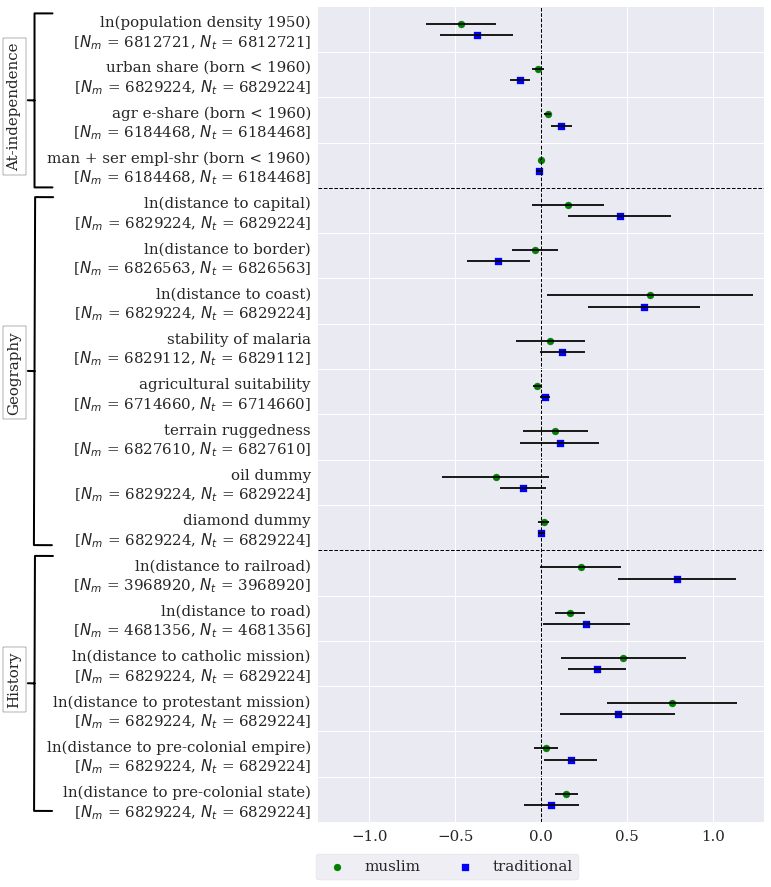

In [8]:
cp = CoefPlot(dfi)
f = cp.grouped_dotplot('b', 'majrel', 'covariate', err='err_t', figsize=(8,15), 
                        order_groups_by_variable='ordr',
                        within_group_order=['muslim', 'traditional'],
                        zero_line=True, group_separators=True,
                        legend=True, legend_bbox=(-0.02,-0.08), legend_columns=3)
ax = f.axes[0]
brack1 = ax.annotate('At-independence', xy=(-0.63, 0.885), xytext=(-0.68, 0.799), 
                 xycoords='axes fraction', 
                 textcoords='axes fraction', 
                 fontsize=15, ha='center', va='bottom',
                 bbox=dict(boxstyle='square', fc='white', ec='black'),
                 arrowprops=dict(arrowstyle='-[, widthB=5.8, lengthB=1.2,angleB=1.2',
                                 connectionstyle="arc,angleA=0,angleB=-181.2,armA=0,armB=30,rad=0",
                                 lw=2.0, color='black'))

brack2 = ax.annotate('Geography', xy=(-0.63, 0.553), xytext=(-0.68, 0.5), 
                 xycoords='axes fraction', 
                 textcoords='axes fraction', 
                 fontsize=15, ha='center', va='bottom',
                 bbox=dict(boxstyle='square', fc='white', ec='black'),
                 arrowprops=dict(arrowstyle='-[, widthB=11.6, lengthB=1.2,angleB=1.2',
                                 connectionstyle="arc,angleA=0,angleB=-181.4,armA=0,armB=30,rad=0",
                                 lw=2.0, color='black'))

brack3 = ax.annotate('History', xy=(-0.63, 0.17), xytext=(-0.68, 0.14), 
                 xycoords='axes fraction', 
                 textcoords='axes fraction', 
                 fontsize=15, ha='center', va='bottom',
                 bbox=dict(boxstyle='square', fc='white', ec='black'),
                 arrowprops=dict(arrowstyle='-[, widthB=8.5, lengthB=1.2,angleB=1.2',
                                 connectionstyle="arc,angleA=0,angleB=-181.4,armA=0,armB=30,rad=0",
                                 lw=2.0, color='black'))

ax.axhline(y=11, linestyle='--', color='black', linewidth=1)
ax.axhline(y=27, linestyle='--', color='black', linewidth=1)
ax.set_xlim([-1.3, 1.3])

brack1.set_rotation(90)
brack2.set_rotation(90)
brack3.set_rotation(90)

In [9]:
for standardized in ['no', 'yes']:
    if standardized == 'no':
        outsuff = 'uns'
    else:
        outsuff = 's'
    dfi = df[(df['standardized'] == standardized)].reset_index(drop=True).copy(deep=True)
            ########################################################################
            
    cp = CoefPlot(dfi)
    f = cp.grouped_dotplot('b', 'majrel', 'covariate', err='err_t', figsize=(10,15), 
                            order_groups_by_variable='ordr',
                            within_group_order=['muslim', 'traditional'],
                            zero_line=True, group_separators=True,
                            legend=True, legend_bbox=(-0.02,-0.08), legend_columns=3)
    ax = f.axes[0]
    brack1 = ax.annotate('At-independence', xy=(-0.63, 0.885), xytext=(-0.68, 0.799), 
                     xycoords='axes fraction', 
                     textcoords='axes fraction', 
                     fontsize=15, ha='center', va='bottom',
                     bbox=dict(boxstyle='square', fc='white', ec='black'),
                     arrowprops=dict(arrowstyle='-[, widthB=5.8, lengthB=1.2,angleB=1.2',
                                     connectionstyle="arc,angleA=0,angleB=-181.2,armA=0,armB=30,rad=0",
                                     lw=2.0, color='black'))

    brack2 = ax.annotate('Geography', xy=(-0.63, 0.553), xytext=(-0.68, 0.5), 
                     xycoords='axes fraction', 
                     textcoords='axes fraction', 
                     fontsize=15, ha='center', va='bottom',
                     bbox=dict(boxstyle='square', fc='white', ec='black'),
                     arrowprops=dict(arrowstyle='-[, widthB=11.6, lengthB=1.2,angleB=1.2',
                                     connectionstyle="arc,angleA=0,angleB=-181.4,armA=0,armB=30,rad=0",
                                     lw=2.0, color='black'))

    brack3 = ax.annotate('History', xy=(-0.63, 0.17), xytext=(-0.68, 0.14), 
                     xycoords='axes fraction', 
                     textcoords='axes fraction', 
                     fontsize=15, ha='center', va='bottom',
                     bbox=dict(boxstyle='square', fc='white', ec='black'),
                     arrowprops=dict(arrowstyle='-[, widthB=8.5, lengthB=1.2,angleB=1.2',
                                     connectionstyle="arc,angleA=0,angleB=-181.4,armA=0,armB=30,rad=0",
                                     lw=2.0, color='black'))

    ax.axhline(y=11, linestyle='--', color='black', linewidth=1)
    ax.axhline(y=27, linestyle='--', color='black', linewidth=1)
    if standardized == 'yes':
        ax.set_xlim([-1,1])
    else:
        ax.set_xlim([-1.3, 1.3])

    brack1.set_rotation(90)
    brack2.set_rotation(90)
    brack3.set_rotation(90)

    f.savefig('{}/_4_covariates_simple_mean_tests_{}tandardized.pdf'.format(outdir, outsuff), bbox_inches='tight', dpi=100)
    plt.close(f)